<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# Setup
Let's begin by installing and importing the modules we'll need.

In [1]:
!pip install -q --upgrade pyro-ppl torch
import pyro
import torch
import pyro.distributions as dist

     |████████████████████████████████| 634kB 7.8MB/s 


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 1. **Pyro’s distributions** (http://docs.pyro.ai/en/stable/distributions.html) :


---
* Pyro provides a wide range of distributions: **Normal, Beta, Cauchy, Dirichlet, Gumbel, Poisson, Pareto, etc.**

---


In [2]:
normal = dist.Normal(0,1)
normal

Normal(loc: 0.0, scale: 1.0)


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---

* Samples from the distributions are [Pytorch’s Tensor objects](https://pytorch.org/cppdocs/notes/tensor_creation.html) (i.e. multidimensional arrays).

---


In [3]:
sample = normal.sample()
sample

tensor(-0.3225)

In [4]:
sample = normal.sample(sample_shape=[3,4,5])
sample

tensor([[[ 0.7883, -1.3058,  0.7426,  1.2841, -0.2396],
         [ 0.1835, -0.6280, -0.4391,  1.0526,  0.3082],
         [-1.6338, -0.5862,  0.8216, -0.2679,  0.9951],
         [ 1.1403, -0.7719, -0.9397, -1.5962, -0.0506]],

        [[-0.1829,  0.6915,  0.0463,  1.8390,  1.0070],
         [ 1.9587, -2.0530, -0.7932,  1.5050, -1.4956],
         [-0.0090,  0.7655, -1.5157, -0.7347,  0.3501],
         [ 1.7394, -1.3973, -0.7458, -0.6562, -1.6291]],

        [[ 1.5483, -0.2205,  1.6049,  1.0343, -0.7345],
         [-0.4622,  1.2203, -0.1256, -0.7451,  1.7241],
         [-0.3981, -0.8367,  0.3000, -0.8977, -0.7001],
         [-0.2967, -0.6556, -0.0028,  0.1784, -1.5219]]])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We can query the **dimensionlity** of a tensor with the ``shape`` property

---

In [5]:
sample = normal.sample(sample_shape=[3,4,5])
sample.shape

torch.Size([3, 4, 5])


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


---
* Operations, like **log-likelihood**, are defined over tensors.

---



In [6]:
normal.log_prob(sample)

tensor([[[-1.0156, -0.9483, -0.9219, -0.9198, -1.2728],
         [-1.0537, -1.5642, -2.7787, -0.9562, -1.1994],
         [-1.1631, -1.1565, -1.6913, -1.0089, -1.0425],
         [-0.9336, -0.9750, -1.0151, -0.9256, -1.1558]],

        [[-1.7375, -1.0778, -1.9444, -1.7538, -0.9300],
         [-1.5484, -1.7851, -0.9719, -0.9900, -1.1599],
         [-1.0578, -2.7022, -1.4789, -1.3314, -1.2410],
         [-2.8692, -1.5300, -0.9992, -1.0092, -2.6037]],

        [[-0.9741, -1.1717, -0.9450, -7.3635, -1.0786],
         [-1.0449, -3.7393, -0.9500, -1.7415, -1.7805],
         [-1.0403, -2.1546, -1.4409, -1.1891, -1.1003],
         [-0.9473, -2.1620, -0.9502, -2.0510, -2.0727]]])

In [7]:
torch.sum(normal.log_prob(sample))

tensor(-90.3172)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---

* **Multiple distributions** can be embedded in single object.

* Below we define **three Normal distributions with different means but the same scale** in a single object.

---

In [8]:
normal = dist.Normal(torch.tensor([1.,2.,3.]),1.)
normal

Normal(loc: torch.Size([3]), scale: torch.Size([3]))

In [9]:
normal.sample()

tensor([0.7326, 2.8013, 3.4101])

In [10]:
normal.log_prob(normal.sample())

tensor([-0.9190, -0.9222, -1.4851])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### **<span style="color:red">Exercise: Open the notebook and play around</span>**

* Test that everything works.
* Play a bit with the code in Section 1 of the notebook.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# 2. **Pyro’s models** (http://pyro.ai/examples/intro_part_i.html) :

---
* In Pyro, a probabilistic model is defined as a **stochastic function** (i.e. every time it is run, it returns a new sample).

* Each random variable is associated with a **primitive stochastic function** using the construct ``pyro.sample(...)``.
---


### 2.1 A Temperature Model



As initial running example, we consider the problem of **modelling the temperature**. We first start with a simple model where temperture is modeled using a random Normal variable.

In [11]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    return temp

print(model())
print(model())

tensor(10.8598)
tensor(12.1554)


See how the model is a stochastic function which **returns a different value everytime it is invoked**. 

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 2.2 A Temperature-Sensor Model

---
* In Pyro, a stochastic method is defined as a **composition of primitive stochastic functions**.
* The temperature Model: we consider the presence of a **temperature sensor**. 
  * The temperature sensor gives **noisy observations** about the real temperature.
  * The **error** of the sensor's measurements **is known**.
  * A graphical representation of this model:

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor.png?raw=1" alt="Drawing" width="150">
</center>
---


In [12]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 1.0))
    return (temp, sensor)

out1 = model()
out1

(tensor(16.4544), tensor(16.6044))

---
* The above method defines a joint probability distribution:
$$p(sensor, temp) = p(sensor|temp)p(temp)$$




* In this case, we have a simple dependency between the variables. But, as we are in a PPL, dependencies can be expressed in terms of complex deterministic functions (more examples later).

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 3. **Pyro’s inference** (http://pyro.ai/examples/intro_part_ii.html) :

### Auxiliary inference functions (more details on Day 3)

To make inference on Pyro, we will use a variational inference method, which performs gradient-based optimization to solve the inference problem. More details will be given on Day 3. 

In [13]:
from torch.distributions import constraints
from pyro.optim import SGD
from pyro.infer import Trace_ELBO
import matplotlib.pyplot as plt
from pyro.contrib.autoguide import AutoDiagonalNormal


def svi(temperature_model, guide, obs, num_steps = 5000, plot = False):
    pyro.clear_param_store()
    svi = pyro.infer.SVI(model=temperature_model,
                         guide=guide,
                         optim=SGD({"lr": 0.001, "momentum":0.1}),
                         loss=Trace_ELBO())

    losses, a,b  = [], [], []
    
    for t in range(num_steps):
        losses.append(svi.step(obs))
        if t%250==0:
            print('Step: '+str(t)+'. Loss: ' +str(losses[-1]))
            

    if (plot):
        plt.plot(losses)
        plt.title("ELBO")
        plt.xlabel("step")
        plt.ylabel("loss");
        plt.show()

---
* To make inference in Pyro over a given model we need to define a *guide*, this *guide* has the same signature than its counterpart model. 

* The guide must provide samples for those variables of the model which are not observed using again the ``pyro.sample`` construct. 

* Guides are also parametrized using Pyro's parameters (``pyro.param``), so the variational inference algorithm will optimize these parameters. 

* All of that will be explained in detail on Day 3.

---

In [14]:
#The guide
def guide(obs):
    a = pyro.param("mean", torch.tensor(0.0))
    b = pyro.param("scale", torch.tensor(1.), constraint=constraints.positive)
    temp = pyro.sample('temp', dist.Normal(a, b))

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### 3.1  Conditioning on a single observation

Now, we continue with the last model defined in section 2.2, and assume we have a sensor reading and we want to compute the posterior distribution over the real temperature. 
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor.png?raw=1" alt="Drawing" width="150">
</center>

---
* This can be achived by introducing **observations in the random variable** with the keyword ``obs=``.

---

In [15]:
#The observatons   
obs = {'sensor': torch.tensor(18.0)}

def model(obs):
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


---
* Inference is made using the previously defined auxiliary functions, ``svi`` and ``guide``. 

* We can query the **posterior probability distribution**: 


$$p(temp | sensor=18)=\frac{p(sensor=18|temp)p(temp)}{\int p(sensor=18|temp)p(temp) dtemp}$$

---

Step: 0. Loss: 179.4401866197586
Step: 250. Loss: 95.38141864538193
Step: 500. Loss: 48.03230041265488
Step: 750. Loss: 31.63528883457184
Step: 1000. Loss: 9.491780877113342
Step: 1250. Loss: 6.601719856262207
Step: 1500. Loss: 3.9994720220565796
Step: 1750. Loss: 3.8397821187973022
Step: 2000. Loss: 1.5782092213630676
Step: 2250. Loss: 4.181357383728027
Step: 2500. Loss: 2.9339876770973206
Step: 2750. Loss: 2.403275966644287
Step: 3000. Loss: 2.3200456500053406
Step: 3250. Loss: 2.670698404312134
Step: 3500. Loss: 2.7513004541397095
Step: 3750. Loss: 2.6843894124031067
Step: 4000. Loss: 2.58638334274292
Step: 4250. Loss: 2.6435471773147583
Step: 4500. Loss: 2.5702003836631775
Step: 4750. Loss: 2.6331160068511963


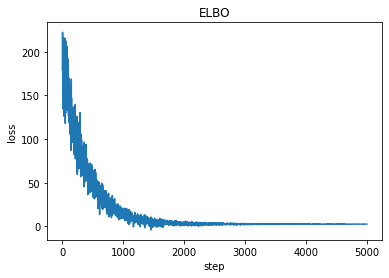

P(Temperature|Sensor=18.0) = 
Normal(loc: 17.37796974182129, scale: 0.9122136831283569)



In [17]:
#Run inference
svi(model,guide,obs, plot=True)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
print("")

---
* Inference is an **optimization procedure**. 

* The **ELBO function is minimized** during the variational inference process.

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 3.2  Learning from a bunch of observations

---
* Let us assume we have a **set of observations** about the temperature at different time steps. 

* In this case, and following a probabilistic modelling approach, we define a **set of random variables**.

* One random variable for each **observation**, using a standard ``for-loop``.

---

In [18]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(15.0, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---

* What if we do **not know the mean temperature**. 

* We can **infer it from the data** by, e.g., using a **maximum likelihood** approach,

$$ \mu_{t} = \arg\max_\mu \ln p(s_1,\ldots,s_n|\mu) = \arg\max_\mu \prod_i \int_{t_i} p(s_i|t_i)p(t_i|\mu) dt_i $$
where $s_i$ and $t_i$ denote the sensor reading and the real temperature at time $i$. 

* The graphical model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem_sensor4.png?raw=1" alt="Drawing" width="150">
</center>
* With PPLs, we do not have to care about the **underlying inference problem** We just define the model and let the **PPL's engine** make the work for us. 

* We use Pyro's parameters (defined as ``pyro.param``), which are free variables we can optimize. 



---

In [19]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.param('mean_temp', torch.tensor(15.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

In [20]:
#@title
#Define the guide
def guide(obs):
    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.positive)
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))

In [21]:
#@title
#Run inference
svi(model, guide, obs, num_steps=1000)

#Print results
print("Estimated Mean Temperature")
print(pyro.param("mean_temp").item())

Step: 0. Loss: 40.84312582015991
Step: 250. Loss: 23.1629496216774
Step: 500. Loss: 19.18970489501953
Step: 750. Loss: 19.122772216796875
Estimated Mean Temperature
19.113811492919922


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* Instead of performing *maximum likelihood* learning, we can perform **Bayesian learning**.

* We treat the unknown quantity as a **random variable**.

* This model can be graphically represented as follows:

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="150">
</center>
---
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---

In [22]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

---
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We perform inference over this model:

 $$ p(\mu_t | s_1,\ldots, s_n)=\frac{p(\mu_t)\prod_{i=1}^n \int p(s_i|t_i)p(t_i|\mu_t)dt_i }{\int \prod_{i=1}^n p(s_i|\mu_t)p(\mu_t) d\mu} $$
---


In [23]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.positive)
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))

In [24]:
import time
        
#Run inference
start = time.time()
svi(model, guide, obs, num_steps=1000)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

Step: 0. Loss: 22.65133512020111
Step: 250. Loss: 23.58249068260193
Step: 500. Loss: 22.731377065181732
Step: 750. Loss: 21.639172077178955
P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =
Normal(loc: 19.251449584960938, scale: 0.6192578077316284)

13.708425045013428 seconds


---
* The result of the learning is **not a point estimate**.

* We have a **posterior distribution** which captures **uncertainty** about the estimation.

---

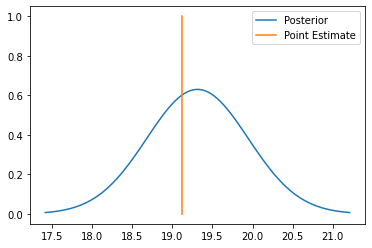

In [25]:
import numpy as np
import scipy.stats as stats

mu = 19.312837600708008
scale = 0.6332376003265381
x = np.linspace(mu - 3*scale, mu + 3*scale, 100)
plt.plot(x, stats.norm.pdf(x, mu, scale), label='Posterior')
point = 19.123859405517578
plt.plot([point, point],[0., 1.], label='Point Estimate')
plt.legend()
plt.show()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 3.3 The use of ``plate`` construct

---

* Pyro can exploit **conditional independencies and vectorization** to make inference much faster. 

* This can be done with the construct **``plate``**. 

* With this construct, we can indicate that the variables $s_i$ and $t_i$ are **conditionally indepdendent** from another variables $s_j$ and $t_j$ given $\mu_t$. 

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="150">
</center>
---



In [26]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    with pyro.plate('a', obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

---
* The ``plate`` construct reflects the standard notational use in graphical models denoting the **repetition of some parts of of the graph**. 
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor3.png?raw=1" alt="Drawing" width="250">
</center>
* We can here make a distinction between **local** and **global** random variables: 

>* **Local random variables** caputure **specific information** about the $i$-th data sample (i.e. the real temperature at this moment in time).

>* **Global random variables** capture **common information** about all the data samples (i.e. the average temperature of all data samples). 

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Observe how inference in this model is much **faster**. 

In [29]:
#@title
#Define the guide
def guide(obs_sensor):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    with pyro.plate('a', obs['sensor'].shape[0]) as i:
        mean_i = pyro.param('mean_i', obs['sensor'][i])
        scale_i = pyro.param('scale_i', torch.tensor(1.), constraint=constraints.positive)
        temp = pyro.sample('temp', dist.Normal(mean_i, scale_i))    

In [39]:
#Run inference
start = time.time()
svi(model, guide, obs, num_steps=1000)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

Step: 0. Loss: 25.549444395420245
Step: 250. Loss: 21.874870880814992
Step: 500. Loss: 22.243264585027912
Step: 750. Loss: 24.533807144481546
P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =
Normal(loc: 17.59701156616211, scale: 0.6289377212524414)

3.400059223175049 seconds



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### **<span style="color:red">Exercise 1: </span>The role of *prior distributions* in learning**

In this case we just want to llustrate how the output of learning depends of the particular prior we introduce in the model. Play with different options and extract conclusions:

1. What happens if we change the mean of the prior?
2. What happens if we change the scale of the prior?
3. What happens to the posterior if the number of data samples deacreases and increases?

Solution:
1. For the small variance, the change in mean of prior will affect the posterior distribution as well. In case of large value of variance, the posterior will be dominated by the data and ther will be no significant effect from prior.

2. As the value fo scale increses, the effect of prior on the posterior reduces and the nature of posterior is becoe more and more effected by the observed data.

3. If the number of data point is small the prior will have a strong effect on posterior. On other ahnd if there is a lot of data, data will have more pronounced effect on posterior as comapred to prior.

Step: 0. Loss: 19.979077178262223
Step: 250. Loss: 22.422034346799542
Step: 500. Loss: 22.42334831066269
Step: 750. Loss: 22.906902014675524
P(Temperature|Sensor=18.0) = 
Normal(loc: 17.28504180908203, scale: 0.613699197769165)


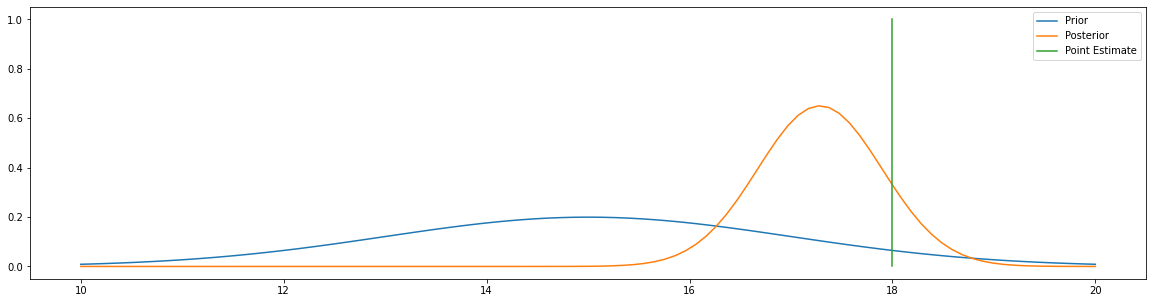

In [41]:
#The observatons   
sample_size = 10
obs = {'sensor': torch.tensor(np.random.normal(18,2,sample_size))}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    with pyro.plate('a', obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

#Run inference
svi(model, guide, obs, num_steps=1000)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))

plt.figure(figsize=(20, 5))
x = np.linspace(10, 20, 100)
plt.plot(x, stats.norm.pdf(x, 15.0, 2.0), label='Prior')
plt.plot(x, stats.norm.pdf(x, pyro.param("mean").item(), pyro.param("scale").item()), label='Posterior')
point = 18
plt.plot([point, point],[0., 1.], label='Point Estimate')
plt.legend()
plt.show()


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# **4.  Icecream Shop**


* We have an ice-cream shop and we **record the ice-cream sales and the average temperature of the day** (using a temperature sensor).

* We know **temperature affects the sales** of ice-creams.

* We want to **precisely model** how temperature affects ice-cream sales.

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/Ice-cream_shop_-_Florida.jpg" alt="Drawing" width=300 >
</center>



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


---
* We have **observations** from temperature and sales.

* Sales are modeled with a **Poisson** distribution:

>- The rate of the Poisson **linearly depends of the real temperature**.
---

Next figure provides a graphical and a probabilistic description of the model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/Ice-Cream-Shop-Model.png?raw=1" alt="Drawing" width=700>
</center>



In [44]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))

    with pyro.plate('a', obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])
        rate = torch.max(torch.tensor(0.001), alpha + beta*temp)
        sales = pyro.sample('sales', dist.Poisson(rate), obs=obs['sales'])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


In [45]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))

    alpha_mean = pyro.param("alpha_mean", torch.mean(obs['sensor']))
    alpha_scale = pyro.param("alpha_scale", torch.tensor(1.), constraint=constraints.positive)
    alpha = pyro.sample('alpha', dist.Normal(alpha_mean, alpha_scale))

    beta_mean = pyro.param("beta_mean", torch.tensor(1.0))
    beta_scale = pyro.param("beta_scale", torch.tensor(1.), constraint=constraints.positive)
    beta = pyro.sample('beta', dist.Normal(beta_mean, beta_scale))

    with pyro.plate('a', obs['sensor'].shape[0]) as i:
        mean_i = pyro.param('mean_i', obs['sensor'][i])
        scale_i = pyro.param('scale_i', torch.tensor(1.), constraint=constraints.positive)
        temp = pyro.sample('temp', dist.Normal(mean_i, scale_i))  

---
* We run the **(variational) inference engine** and get the results.

* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.

---

In [46]:
#Run inference
svi(model, guide, obs, num_steps=1000)

#Print results    
print("Posterior temperature mean")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
print("")
print("Posterior alpha")
print(dist.Normal(pyro.param("alpha_mean").item(), pyro.param("alpha_scale").item()))
print("")
print("Posterior aeta")
print(dist.Normal(pyro.param("beta_mean").item(), pyro.param("beta_scale").item()))

Step: 0. Loss: 132.37351417541504
Step: 250. Loss: 65.34156966209412
Step: 500. Loss: 62.99801790714264
Step: 750. Loss: 62.71957212686539
Posterior temperature mean
Normal(loc: 19.30967903137207, scale: 0.6102969646453857)

Posterior alpha
Normal(loc: 19.771968841552734, scale: 1.9134610891342163)

Posterior aeta
Normal(loc: 1.482695460319519, scale: 0.11886706203222275)


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### <span style="color:red">Exercise 2: Introduce Humidity in the Icecream shop model </span> 
---
* Assume we also have a bunch of **humidity sensor measurements**.
* Assume the **sales are also linearly influenced by the humidity**.
* **Extend the above model** in order to integrate all of that.
---

Next figure provides a graphical and a probabilistic description of the model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/Ice-Cream-Shop-Model-Humidity.png?raw=1" alt="Drawing" width=700>
</center>




In [48]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.]),
       'sensor_humidity': torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])}


def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    mean_humidity = pyro.sample('mean_humidity', dist.Normal(80.0, 5.0))
    ## Introduce a random variable "mean_humidity"

    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))
    gamma = pyro.sample('gamma', dist.Normal(0.0, 100.0))
    ## Introduce a coefficient for the humidity "gamma"

    with pyro.plate('a', obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])
        #Add the 'humidity' variable and the 'sensor_humidity' variable
        humidity = pyro.sample('humidity', dist.Normal(mean_humidity, 2.0))
        sensor_humidity = pyro.sample('sensor_humidity', dist.Normal(humidity, 1.0), obs=obs['sensor_humidity'])

        #Add the linear dependency for the rate with respect to temp and humidity (keep torch.max to avoid numerical stability issues)
        rate = torch.max(torch.tensor(0.001), alpha + beta*temp + gamma*humidity)
        sales = pyro.sample('sales', dist.Poisson(rate), obs=obs['sales'])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We run the **(variational) inference engine** and get the results.

* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.

---

In [49]:
#@title
#Auxiliary Guide Code
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))

    meanH = pyro.param("meanH", torch.mean(obs['sensor_humidity']))
    scaleH = pyro.param("scaleH", torch.tensor(1.), constraint=constraints.positive)
    mean_humidity = pyro.sample('mean_humidity', dist.Normal(meanH, scaleH))


    alpha_mean = pyro.param("alpha_mean", torch.mean(obs['sensor']), constraint=constraints.positive)
    alpha_scale = pyro.param("alpha_scale", torch.tensor(1.), constraint=constraints.positive)
    alpha = pyro.sample('alpha', dist.Normal(alpha_mean, alpha_scale))

    beta_mean = pyro.param("beta_mean", torch.tensor(1.0), constraint=constraints.positive)
    beta_scale = pyro.param("beta_scale", torch.tensor(1.), constraint=constraints.positive)
    beta = pyro.sample('beta', dist.Normal(beta_mean, beta_scale))

    gamma_mean = pyro.param("gamma_mean", torch.tensor(1.0), constraint=constraints.positive)
    gamma_scale = pyro.param("gamma_scale", torch.tensor(1.), constraint=constraints.positive)
    gamma = pyro.sample('gamma', dist.Normal(gamma_mean, gamma_scale))

    with pyro.plate('a', obs['sensor'].shape[0]) as i:
        mean_i = pyro.param('mean_i', obs['sensor'][i])
        scale_i = pyro.param('scale_i', torch.tensor(1.), constraint=constraints.positive)
        temp = pyro.sample('temp', dist.Normal(mean_i, scale_i))
        meanH_i = pyro.param('meanH_i', obs['sensor_humidity'][i])
        scaleH_i = pyro.param('scaleH_i', torch.tensor(1.), constraint=constraints.positive)
        humidity = pyro.sample('humidity', dist.Normal(meanH_i, scaleH_i)) 

In [50]:
#Run inference
svi(model, guide, obs, num_steps=1000)

#Print results    
print("Posterior Temperature Mean")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
print("")
print("Posterior Humidity Mean")
print(dist.Normal(pyro.param("meanH").item(), pyro.param("scaleH").item()))
print("")
print("Posterior Alpha")
print(dist.Normal(pyro.param("alpha_mean").item(), pyro.param("alpha_scale").item()))
print("")
print("Posterior Beta")
print(dist.Normal(pyro.param("beta_mean").item(), pyro.param("beta_scale").item()))
print("")
print("Posterior Gamma")
print(dist.Normal(pyro.param("gamma_mean").item(), pyro.param("gamma_scale").item()))

Step: 0. Loss: 979.5027298927307
Step: 250. Loss: 171.01159632205963
Step: 500. Loss: 179.6702891588211
Step: 750. Loss: 171.59571385383606
Posterior Temperature Mean
Normal(loc: 19.288379669189453, scale: 0.6418865323066711)

Posterior Humidity Mean
Normal(loc: 86.29143524169922, scale: 0.6307233572006226)

Posterior Alpha
Normal(loc: 14.273118019104004, scale: 1.7955896854400635)

Posterior Beta
Normal(loc: 0.7976348996162415, scale: 0.11764489859342575)

Posterior Gamma
Normal(loc: 0.19947901368141174, scale: 0.026183132082223892)


In [58]:
def sales_sample(n):
    a_s = pyro.sample("a_s", dist.Normal(pyro.param("alpha_mean").item(), pyro.param("alpha_scale").item()))
    b_s = pyro.sample("b_s", dist.Normal(pyro.param("beta_mean").item(), pyro.param("beta_scale").item()))
    g_s = pyro.sample("g_s", dist.Normal(pyro.param("gamma_mean").item(), pyro.param("gamma_scale").item()))

    t_s = pyro.sample("t_s", dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
    h_s = pyro.sample("h_s", dist.Normal(pyro.param("meanH").item(), pyro.param("scaleH").item()))

    return pyro.sample("s_s", dist.Poisson(torch.max(torch.tensor(0.001), a_s + b_s*t_s + g_s*h_s)), sample_shape=n)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# 5.  **Temporal Models**

If we think there is a temporal dependency between the variables, we can easily encode that with PPLs. 

---
* Let us assume that there is a **temporal dependency** between the variables.

* E.g. the current **real temperature must be similar to the real temperature in the previous time step**.

* This temporal dependency can **be modeled** using a **for-loop** in Pyro

* Consider the **graphical representation**.
---


<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/tempmodel-temporal-III.png" alt="Drawing" style="width: 350px;" >



In [62]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        if i==0:
            temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        else:
            temp = pyro.sample(f'temp_{i}', dist.Normal(prev_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])
        prev_temp = temp

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We run the **(variational) inference engine** and get the results.

* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.

---

In [63]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.positive)
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))

In [64]:
import time
        
#Run inference
svi(model, guide, obs, num_steps=2000)

smooth_temp=[]
for i in range(obs['sensor'].shape[0]):
    smooth_temp.append(pyro.param(f'mean_{i}').item())

print('Finished')

Step: 0. Loss: 23.520971417427063
Step: 250. Loss: 22.656698524951935
Step: 500. Loss: 22.894070506095886
Step: 750. Loss: 19.465146839618683
Step: 1000. Loss: 22.07674127817154
Step: 1250. Loss: 20.509039044380188
Step: 1500. Loss: 18.89731192588806
Step: 1750. Loss: 18.452313542366028
Finished


---
* Plot the **observered measurements** of the temperature **against** the inferred **real temperature**.

* By querying the **local hidden** we can **smooth** the temperature.

* The **recovered temperature** is much less noisy than the measured one. 
---


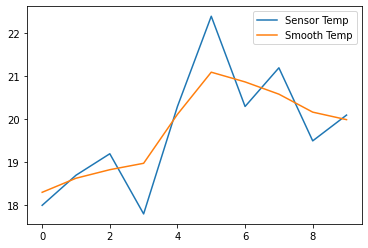

In [65]:
import matplotlib.pyplot as plt
plt.plot([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1], label='Sensor Temp')
plt.plot(smooth_temp, label='Smooth Temp')
plt.legend()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### <span style="color:red">Exercise 3:  Temporal Extension of the Iceacream shop model </span> 

--- 
* **Extends** Excersise 2.
* Assume temperature depends of the **temperature in the previous day**.
* Assume humidity depends of the **humidity in the previous day**.
* Assume sales depends on the **current temperature and humidity**.
* Use the following **graphical representation for reference**.
* Consider here that the plate representation has to be coded in Pyro using a **``for-loop``**.

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/icecream-model-temporal.png" alt="Drawing" width=500 >




In [69]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.]),
       'sensor_humidity': torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])}



def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    mean_humidity = pyro.sample('mean_humidity', dist.Normal(torch.mean(obs['sensor_humidity']), 2.0))
    ## Introduce a random variable "mean_humidity"


    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))
    gamma = pyro.sample('gamma', dist.Normal(0.0, 100.0))
    ## Introduce a coefficient for the humidity "gamma"

    for i in range(obs['sensor'].shape[0]):
        if i==0:
            temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
            humidity = pyro.sample(f'humidity_{i}', dist.Normal(mean_humidity, 2.0))
            #Introduce the 'humidity' variable at time 0.

        else:
            temp = pyro.sample(f'temp_{i}', dist.Normal(prev_temp, 2.0))
            humidity = pyro.sample(f'humidity_{i}', dist.Normal(prev_humidity, 2.0))
            #Introduce the f'humidity_{i}' variable defining the transition
            
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])
        sensor_humidity = pyro.sample(f'sensor_humidity_{i}', dist.Normal(humidity, 1.0), obs=obs['sensor_humidity'][i])
        #Introduce the f'sensor_humidity_{i}' variable. 

        #Add the linear dependency for the rate with respect to temp and humidity (keep torch.max to avoid numerical stability issues)
        rate = torch.max(torch.tensor(0.01), alpha + beta*temp + gamma*humidity)
        sales = pyro.sample(f'sales_{i}', dist.Poisson(rate), obs=obs['sales'][i])

        prev_temp = temp
        prev_humidity = humidity
        #Keep humidity for the next time step. 
        


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We run the **(variational) inference engine** and get the results.

* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.

---

In [70]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))

    meanH = pyro.param("meanH", torch.mean(obs['sensor_humidity']), constraint=constraints.positive)
    scaleH = pyro.param("scaleH", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    humidity_mean = pyro.sample('mean_humidity', dist.Normal(meanH, scaleH))


    alpha_mean = pyro.param("alpha_mean", torch.mean(obs['sensor']))
    alpha_scale = pyro.param("alpha_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    alpha = pyro.sample('alpha', dist.Normal(alpha_mean, alpha_scale))

    beta_mean = pyro.param("beta_mean", torch.tensor(0.0))
    beta_scale = pyro.param("beta_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    beta = pyro.sample('beta', dist.Normal(beta_mean, beta_scale))

    gamma_mean = pyro.param("gamma_mean", torch.tensor(0.0))
    gamma_scale = pyro.param("gamma_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    gamma = pyro.sample('gamma', dist.Normal(gamma_mean, gamma_scale))

    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.greater_than(0.01))
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))
        meanH_i = pyro.param(f'meanH_{i}', obs['sensor_humidity'][i])
        scaleH_i = pyro.param(f'scaleH_{i}', torch.tensor(1.), constraint=constraints.greater_than(0.01))
        humidity_i = pyro.sample(f'humidity_{i}', dist.Normal(meanH_i, scaleH_i))

In [71]:
import time
        
#Run inference
svi(model, guide, obs, num_steps=2000)

smooth_temp=[]
smooth_humidity=[]

for i in range(obs['sensor'].shape[0]):
    smooth_temp.append(pyro.param(f'mean_{i}').item())
    smooth_humidity.append(pyro.param(f'meanH_{i}').item())

print('Finished')

Step: 0. Loss: 758.5405958294868
Step: 250. Loss: 659.8423628807068
Step: 500. Loss: 713.2208249568939
Step: 750. Loss: 1246.5822094082832
Step: 1000. Loss: 371.63073056936264
Step: 1250. Loss: 509.49141305685043
Step: 1500. Loss: 383.7970544695854
Step: 1750. Loss: 1205.98568379879
Finished


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We can plot the observered measurements of the temperature against the **inferred real temperature** by our model. 

* The **recovered temperature** is much less noisy than the real one.

---


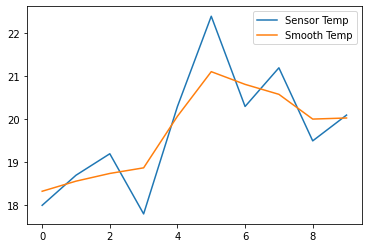

In [72]:
plt.plot([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1], label='Sensor Temp')
plt.plot(smooth_temp, label='Smooth Temp')
plt.legend()

---
* We can plot the observered measurements of the humidity against the **inferred real humidity** by our model. 

* The **recovered humidity** is much less noisy than the real one.

---


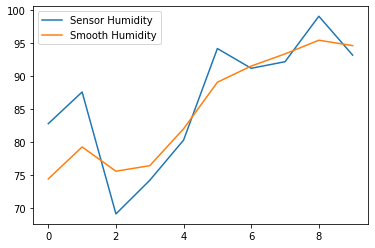

In [73]:
humidity = torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])
plt.plot(humidity.detach().numpy(), label='Sensor Humidity')
plt.plot(smooth_humidity, label='Smooth Humidity')
plt.legend()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>
